# **Package Installation and Loading Data**

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download ananthu017/emotion-detection-fer/activity

 74% 48.0M/65.2M [00:00<00:00, 100MB/s] 
100% 65.2M/65.2M [00:00<00:00, 121MB/s]


In [4]:
! unzip emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [5]:
#Class to load the dataset images from drivce
import os
import cv2
import numpy as np

class SimpleDatasetLoader:
    # Method: Constructor
    def __init__(self, preprocessors=None):
        self.preprocessors = preprocessors

        if self.preprocessors is None:
            self.preprocessors = []

    # Method: Used to load a list of images for pre-processing
    def load(self, image_paths, verbose=-1):
        """
        :param image_paths: List of image paths
        :param verbose: Parameter for printing information to console
        :return: Tuple of data and labels
        """
        data, labels = [], []

        for i, image_path in enumerate(image_paths):
            image = cv2.imread(image_path)
            partOfPath = "/content/train/"
            if "/content/test" in str(image_path) :
              partOfPath = "/content/test/"
            # print(image_paths)
            preLabel = image_path[image_path.index(partOfPath) + len(partOfPath):]
            preLabel[:preLabel.index("/")]
            label = preLabel[:preLabel.index("/")]
            if self.preprocessors is not None:
                for p in self.preprocessors:
                    image = p.preprocess(image)
            data.append(image)
            labels.append(label)
            if verbose > 0 and i > 0 and (i+1) % verbose == 0:
                print('[INFO]: Processed {}/{}'.format(i+1, len(image_paths)))

        return (np.array(data), np.array(labels))

In [6]:
#Class Preprocessror 
class SimplePreprocessor:
    # Method: Constructor
    def __init__(self, width, height, isGray,  interpolation=cv2.INTER_AREA):
        """
        :param width: Image width
        :param height: Image height
        :param interpolation: Interpolation algorithm
        """
        self.width = width
        self.height = height
        self.interpolation = interpolation
        self.isGray = isGray

    # Method: Used to resize the image to a fixed size (ignoring the aspect ratio)
    def preprocess(self, image):
        """
        :param image: Image
        :return: Re-sized image
        """
        image = cv2.resize(image, (self.width, self.height), interpolation=self.interpolation)
        
        if self.isGray:
          image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
        return image

# KNN (K = 3, Weights = "distance")

In [7]:
from imutils import paths
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from __main__ import SimplePreprocessor
from __main__ import SimpleDatasetLoader

# Get list of image paths
#print("Data : " + str(train_data[0]) )
image_paths = list(paths.list_images("/content/train"))
# Initialize SimplePreprocessor and SimpleDatasetLoader and load data and labels
print('[INFO]: Images loading....')
sp = SimplePreprocessor(48, 48, True)
sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = sdl.load(image_paths, verbose=1000)


# Encode labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

dataAugmented = data
# data = data.reshape((data.shape[0], 2304))

[INFO]: Images loading....
[INFO]: Processed 1000/28709
[INFO]: Processed 2000/28709
[INFO]: Processed 3000/28709
[INFO]: Processed 4000/28709
[INFO]: Processed 5000/28709
[INFO]: Processed 6000/28709
[INFO]: Processed 7000/28709
[INFO]: Processed 8000/28709
[INFO]: Processed 9000/28709
[INFO]: Processed 10000/28709
[INFO]: Processed 11000/28709
[INFO]: Processed 12000/28709
[INFO]: Processed 13000/28709
[INFO]: Processed 14000/28709
[INFO]: Processed 15000/28709
[INFO]: Processed 16000/28709
[INFO]: Processed 17000/28709
[INFO]: Processed 18000/28709
[INFO]: Processed 19000/28709
[INFO]: Processed 20000/28709
[INFO]: Processed 21000/28709
[INFO]: Processed 22000/28709
[INFO]: Processed 23000/28709
[INFO]: Processed 24000/28709
[INFO]: Processed 25000/28709
[INFO]: Processed 26000/28709
[INFO]: Processed 27000/28709
[INFO]: Processed 28000/28709


In [8]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Print information about memory consumption
print('[INFO]: Features Matrix: {:.1f}MB'.format(float(data.nbytes / 1024*1000.0)))

# Split data into training (75%) and testing (25%) data
(train_x, test_x, train_y, test_y) = train_test_split(data, labels, test_size=0.01, random_state=42)

train_data_dir = "/content/train"
test_data_dir = "/content/test"


train_x = train_x.reshape((train_x.shape[0], 2304))
print(len(train_x))
test_x = test_x.reshape((test_x.shape[0], 2304))

[INFO]: Features Matrix: 64595250.0MB
28421


In [9]:
# Get list of image paths
# print("Data : " + str(train_data[0]) )
image_paths_test = list(paths.list_images("/content/test"))
# Initialize SimplePreprocessor and SimpleDatasetLoader and load data and labels
print('[INFO]: Images loading....')
(test_data, test_labels) = sdl.load(image_paths_test, verbose=1000)


# Encode labels as integers
le2 = LabelEncoder()
test_labels = le2.fit_transform(test_labels)

# test2_generator_all = test_datagen_all.flow(
#     x = test_data,
#     y = test_labels,
#     batch_size = len(test_data),
#     seed = 42
# )

# testX = test2_generator_all.next()[0]
print(len(test_labels))
testX = test_data.reshape((test_data.shape[0], 2304))

[INFO]: Images loading....
[INFO]: Processed 1000/7178
[INFO]: Processed 2000/7178
[INFO]: Processed 3000/7178
[INFO]: Processed 4000/7178
[INFO]: Processed 5000/7178
[INFO]: Processed 6000/7178
[INFO]: Processed 7000/7178
7178


In [ ]:
model2 = KNeighborsClassifier(n_neighbors=3,
                             n_jobs=1, weights = "distance")
model2.fit(train_x, train_y)
prediction2 = model2.predict(testX)

print(classification_report(test_labels, prediction2,
                            target_names=le2.classes_))

              precision    recall  f1-score   support

       angry       0.36      0.28      0.32       958
   disgusted       0.39      0.55      0.46       111
     fearful       0.39      0.36      0.37      1024
       happy       0.44      0.42      0.43      1774
     neutral       0.30      0.43      0.36      1233
         sad       0.35      0.30      0.32      1247
   surprised       0.60      0.60      0.60       831

    accuracy                           0.40      7178
   macro avg       0.40      0.42      0.41      7178
weighted avg       0.40      0.40      0.40      7178



[[28.49686848  1.98329854 11.37787056 19.72860125 21.50313152 11.69102296
   5.21920668]
 [ 6.30630631 54.95495495  5.40540541  7.20720721 12.61261261 11.71171171
   1.8018018 ]
 [ 9.08203125  0.5859375  36.1328125  15.33203125 17.48046875 13.76953125
   7.6171875 ]
 [ 7.1589628   1.1837655   8.39909808 41.82638106 25.02818489 11.44306652
   4.96054115]
 [ 7.13706407  1.29764801  9.7323601  19.38361719 43.06569343 13.70640714
   5.67721006]
 [10.66559743  2.08500401 11.86848436 19.72734563 22.05292702 29.75140337
   3.84923817]
 [ 4.69314079  0.8423586   6.01684717 12.03369434 11.31167268  5.5354994
  59.566787  ]]
[[ 0.          1.98329854 11.37787056 19.72860125 21.50313152 11.69102296
   5.21920668]
 [ 6.30630631  0.          5.40540541  7.20720721 12.61261261 11.71171171
   1.8018018 ]
 [ 9.08203125  0.5859375   0.         15.33203125 17.48046875 13.76953125
   7.6171875 ]
 [ 7.1589628   1.1837655   8.39909808  0.         25.02818489 11.44306652
   4.96054115]
 [ 7.13706407  1.2976

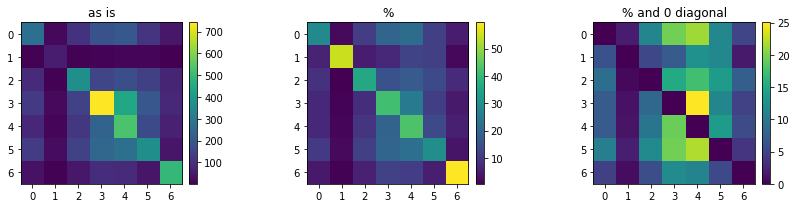

In [ ]:
from sklearn.metrics import confusion_matrix

cmx_svm2 = confusion_matrix(test_labels, prediction2)
plot_confusion_matrix(cmx_svm2)

# KNN (Data Augmentation, K = 3, weights = "distance")

In [ ]:
from imutils import paths
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from __main__ import SimplePreprocessor
from __main__ import SimpleDatasetLoader

# Get list of image paths
#print("Data : " + str(train_data[0]) )
image_paths = list(paths.list_images("/content/train"))
# Initialize SimplePreprocessor and SimpleDatasetLoader and load data and labels
print('[INFO]: Images loading....')
spA = SimplePreprocessor(48, 48, False)
sdlA = SimpleDatasetLoader(preprocessors=[spA])
(dataAugmented, labelsAugmented) = sdlA.load(image_paths, verbose=1000)


# Encode labels as integers
labels = LabelEncoder()
labelsAugmented = labels.fit_transform(labelsAugmented)
# data = data.reshape((data.shape[0], 2304))

[INFO]: Images loading....
[INFO]: Processed 1000/28709
[INFO]: Processed 2000/28709
[INFO]: Processed 3000/28709
[INFO]: Processed 4000/28709
[INFO]: Processed 5000/28709
[INFO]: Processed 6000/28709
[INFO]: Processed 7000/28709
[INFO]: Processed 8000/28709
[INFO]: Processed 9000/28709
[INFO]: Processed 10000/28709
[INFO]: Processed 11000/28709
[INFO]: Processed 12000/28709
[INFO]: Processed 13000/28709
[INFO]: Processed 14000/28709
[INFO]: Processed 15000/28709
[INFO]: Processed 16000/28709
[INFO]: Processed 17000/28709
[INFO]: Processed 18000/28709
[INFO]: Processed 19000/28709
[INFO]: Processed 20000/28709
[INFO]: Processed 21000/28709
[INFO]: Processed 22000/28709
[INFO]: Processed 23000/28709
[INFO]: Processed 24000/28709
[INFO]: Processed 25000/28709
[INFO]: Processed 26000/28709
[INFO]: Processed 27000/28709
[INFO]: Processed 28000/28709


Data Augmentation

In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Print information about memory consumption
# print('[INFO]: Features Matrix: {:.1f}MB'.format(float(data.nbytes / 1024*1000.0)))


# Split data into training (75%) and testing (25%) data
(trainA_x, testA_x, trainA_y, testA_y) = train_test_split(dataAugmented, labelsAugmented, test_size=0.01, random_state=42)
# train_x = data
# train_y = labels

train_data_dir = "/content/train"
test_data_dir = "/content/test"

train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

# Define Flows from directories
train_generator_all = train_datagen.flow(
    x = dataAugmented,
    y = labelsAugmented,
    batch_size = len(dataAugmented),
    seed = 42
)

trainA_x = train_generator_all.next()[0]
print(len(trainA_x))
trainA_x = trainA_x.reshape((trainA_x.shape[0], 6912))

28709


In [ ]:
# Get list of image paths
# print("Data : " + str(train_data[0]) )
image_paths_test = list(paths.list_images("/content/test"))
# Initialize SimplePreprocessor and SimpleDatasetLoader and load data and labels
print('[INFO]: Images loading....')
(testA_data, testA_labels) = sdlA.load(image_paths_test, verbose=1000)


# Encode labels as integers
le2 = LabelEncoder()
testA_labels = le2.fit_transform(testA_labels)

# test2_generator_all = test_datagen_all.flow(
#     x = test_data,
#     y = test_labels,
#     batch_size = len(test_data),
#     seed = 42
# )

test_datagen_all = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)



test_generator_all = test_datagen_all.flow(
    x = testA_data,
    y = testA_labels,
    batch_size = len(testA_labels),
    seed = 42
)

testA_data = test_generator_all.next()[0]
testA_data = testA_data.reshape((testA_data.shape[0], 6912))
# testX = test2_generator_all.next()[0]
print(len(testA_labels))

[INFO]: Images loading....
[INFO]: Processed 1000/7178
[INFO]: Processed 2000/7178
[INFO]: Processed 3000/7178
[INFO]: Processed 4000/7178
[INFO]: Processed 5000/7178
[INFO]: Processed 6000/7178
[INFO]: Processed 7000/7178
7178


In [ ]:
model3 = KNeighborsClassifier(n_neighbors=3,
                             n_jobs=1, weights = "distance")
model3.fit(trainA_x, labelsAugmented)
prediction3 = model3.predict(testA_data)

print(classification_report(testA_labels, prediction3,
                            target_names=le2.classes_))

              precision    recall  f1-score   support

       angry       0.12      0.11      0.11       958
   disgusted       0.02      0.02      0.02       111
     fearful       0.14      0.14      0.14      1024
       happy       0.25      0.27      0.26      1774
     neutral       0.18      0.18      0.18      1233
         sad       0.18      0.17      0.18      1247
   surprised       0.12      0.10      0.11       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



[[11.06471816  1.98329854 14.71816284 26.20041754 19.31106472 16.70146138
  10.02087683]
 [13.51351351  1.8018018  15.31531532 31.53153153 18.01801802 11.71171171
   8.10810811]
 [13.96484375  1.66015625 14.453125   25.5859375  16.40625    16.89453125
  11.03515625]
 [12.62683202  1.69109357 14.54340474 27.11386697 15.44532131 18.09470124
  10.48478016]
 [12.24655312  1.86536902 13.21978913 27.89943228 18.32927818 15.97729116
  10.4622871 ]
 [12.75060144  1.28307939 15.23656776 27.42582197 17.00080192 17.4819567
   8.82117081]
 [13.59807461  1.32370638 12.99638989 25.51143201 17.80986763 18.65222623
  10.10830325]]
[[ 0.          1.98329854 14.71816284 26.20041754 19.31106472 16.70146138
  10.02087683]
 [13.51351351  0.         15.31531532 31.53153153 18.01801802 11.71171171
   8.10810811]
 [13.96484375  1.66015625  0.         25.5859375  16.40625    16.89453125
  11.03515625]
 [12.62683202  1.69109357 14.54340474  0.         15.44532131 18.09470124
  10.48478016]
 [12.24655312  1.8653

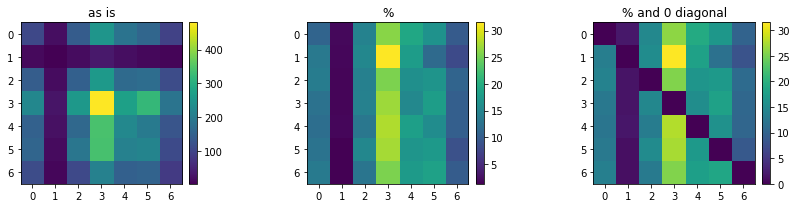

In [ ]:
from sklearn.metrics import confusion_matrix

cmx_svm3 = confusion_matrix(testA_labels, prediction3)
plot_confusion_matrix(cmx_svm3)

# KNN (With Convolution, K = 3, weights = "distance")

In [ ]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [ ]:
# Initialize SimplePreprocessor and SimpleDatasetLoader and load data and labels
print('[INFO]: Images loading....')
spC = SimplePreprocessor(48, 48, True)
sdlC = SimpleDatasetLoader(preprocessors=[spC])
(dataC, labelsC) = sdlC.load(image_paths, verbose=1000)


# Encode labels as integers
le3 = LabelEncoder()
labelsC = le.fit_transform(labelsC)

# data = data.reshape((data.shape[0], 2304))

[INFO]: Images loading....
[INFO]: Processed 1000/28709
[INFO]: Processed 2000/28709
[INFO]: Processed 3000/28709
[INFO]: Processed 4000/28709
[INFO]: Processed 5000/28709
[INFO]: Processed 6000/28709
[INFO]: Processed 7000/28709
[INFO]: Processed 8000/28709
[INFO]: Processed 9000/28709
[INFO]: Processed 10000/28709
[INFO]: Processed 11000/28709
[INFO]: Processed 12000/28709
[INFO]: Processed 13000/28709
[INFO]: Processed 14000/28709
[INFO]: Processed 15000/28709
[INFO]: Processed 16000/28709
[INFO]: Processed 17000/28709
[INFO]: Processed 18000/28709
[INFO]: Processed 19000/28709
[INFO]: Processed 20000/28709
[INFO]: Processed 21000/28709
[INFO]: Processed 22000/28709
[INFO]: Processed 23000/28709
[INFO]: Processed 24000/28709
[INFO]: Processed 25000/28709
[INFO]: Processed 26000/28709
[INFO]: Processed 27000/28709
[INFO]: Processed 28000/28709


In [ ]:
# Get list of image paths
# print("Data : " + str(train_data[0]) )
image_paths_test = list(paths.list_images("/content/test"))
# Initialize SimplePreprocessor and SimpleDatasetLoader and load data and labels
print('[INFO]: Images loading....')
(testC_data, testC_labels) = sdlC.load(image_paths_test, verbose=1000)


# Encode labels as integers
le4 = LabelEncoder()
testC_labels = le4.fit_transform(testC_labels)


[INFO]: Images loading....
[INFO]: Processed 1000/7178
[INFO]: Processed 2000/7178
[INFO]: Processed 3000/7178
[INFO]: Processed 4000/7178
[INFO]: Processed 5000/7178
[INFO]: Processed 6000/7178
[INFO]: Processed 7000/7178


In [ ]:
convolvedDataC = []
convolvedTestC = []
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

for image in dataC:
  convolvedDataC.append(convolve2D(image, kernel))

convolvedDataC = np.array(convolvedDataC)

for image in testC_data:
  convolvedTestC.append(convolve2D(image, kernel))

convolvedTestC = np.array(convolvedTestC)


In [ ]:
convolvedDataC = convolvedDataC.reshape((convolvedDataC.shape[0], 46 * 46))
convolvedTestC = convolvedTestC.reshape((convolvedTestC.shape[0], 46 * 46))

In [ ]:
model5 = KNeighborsClassifier(n_neighbors=3,
                             n_jobs=1, weights = "distance")
model5.fit(convolvedDataC, labelsC)
prediction5 = model5.predict(convolvedTestC)

print(classification_report(testC_labels, prediction5,
                            target_names=le4.classes_))

              precision    recall  f1-score   support

       angry       0.52      0.11      0.18       958
   disgusted       0.54      0.33      0.41       111
     fearful       0.22      0.34      0.27      1024
       happy       0.29      0.44      0.35      1774
     neutral       0.21      0.32      0.26      1233
         sad       0.26      0.08      0.13      1247
   surprised       0.77      0.35      0.48       831

    accuracy                           0.29      7178
   macro avg       0.40      0.28      0.30      7178
weighted avg       0.35      0.29      0.28      7178



[[ 0.          0.41753653 20.45929019 35.59498956 26.20041754  5.11482255
   1.14822547]
 [ 0.9009009   0.         13.51351351 27.92792793 15.31531532  8.10810811
   0.9009009 ]
 [ 2.05078125  0.48828125  0.         32.6171875  24.609375    4.4921875
   1.7578125 ]
 [ 0.90191657  0.62006764 20.74408117  0.         26.26832018  6.03156708
   1.74746336]
 [ 2.10867802  0.486618   21.97891322 36.57745337  0.          5.51500406
   1.21654501]
 [ 1.20288693  0.32076985 20.28869286 41.61988773 27.10505213  0.
   1.042502  ]
 [ 2.40673887  0.24067389 15.04211793 27.07581227 17.20818291  3.12876053
   0.        ]]


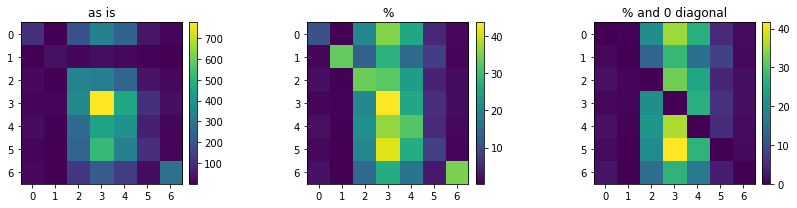

In [ ]:
from sklearn.metrics import confusion_matrix

cmx_svm5 = confusion_matrix(testC_labels, prediction5)
plot_confusion_matrix(cmx_svm5)

# How to find Best K?

In [10]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np 

model = KNeighborsClassifier(n_neighbors=3,n_jobs=1, weights="distance")
model.fit(train_x, train_y)

accuracy = accuracy_score(model.predict(testX), test_labels)
print(accuracy)
n_neighbors = np.array([3,7,8,9,15])
param_grid = {'n_neighbors':n_neighbors, 'weights':['distance', 'uniform']}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(train_x, train_y)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

0.3960713290610198
0.37285828788798747
3


In [12]:
import matplotlib.pyplot as plt
#print(grid.cv_results_)
print(grid.param_grid)
print(grid.best_score_)
print(grid.scorer_)
print(grid.best_params_)

{'n_neighbors': array([ 3,  7,  8,  9, 15]), 'weights': ['distance', 'uniform']}
0.37285828788798747
<function _passthrough_scorer at 0x7efecd48c440>
{'n_neighbors': 3, 'weights': 'distance'}


# Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
  
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()

    print(cmx_norm)
    print(cmx_zero_diag)

# Examples of misclassification

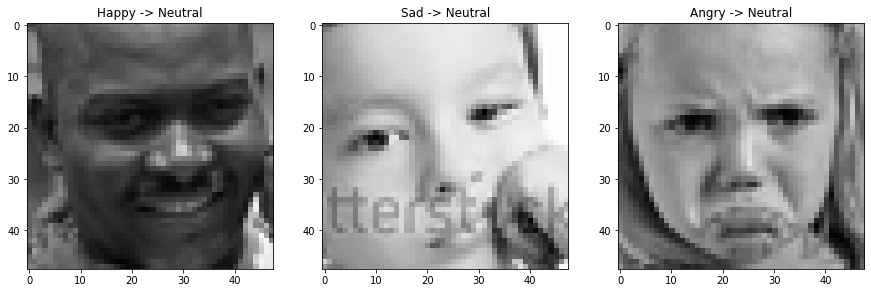

In [ ]:
index = []
title = ['Happy -> Neutral', 'Sad -> Neutral', 'Angry -> Neutral']

happy = np.where(test_labels == 3)
sad = np.where(test_labels == 5)
angry = np.where(test_labels == 0)
neutral_pred = np.where(prediction2 == 4)

# angry misclassified as sad
happy_to_neutral = np.intersect1d(happy, neutral_pred)
index.append(happy_to_neutral[2])
# fear misclassified as sad
sad_to_neutral = np.intersect1d(sad, neutral_pred)
index.append(sad_to_neutral[0])
# neutral misclassified as sad
angry_to_neutral = np.intersect1d(angry, neutral_pred)
index.append(angry_to_neutral[4])

Categories = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
datadir = 'test'
count = 0
count_img = 0

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (15, 15))

#path which contains all the categories of images
for i in Categories:
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        count += 1
        if (count in index) :
            image = cv2.imread(os.path.join(path, img))
            # plot
            ax[count_img].imshow(image)
            ax[count_img].title.set_text(title.pop(0))
            count_img += 1            

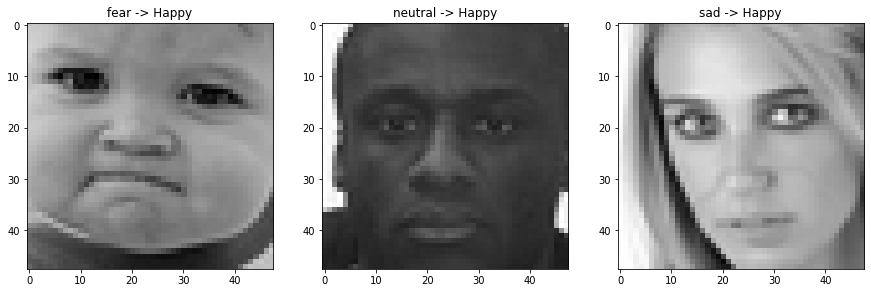

In [ ]:
index3 = []
title = ['fear -> Happy', 'neutral -> Happy', 'sad -> Happy']

fearA = np.where(testA_labels == 2)
neutralA = np.where(testA_labels == 4)
sadA = np.where(testA_labels == 5)
happy_pred = np.where(prediction3 == 3)

# fear misclassified as happy
fear_to_happy = np.intersect1d(fearA, happy_pred)
index3.append(fear_to_happy[0])
# neutral misclassified as happy
neutral_to_happy = np.intersect1d(neutralA, happy_pred)
index3.append(neutral_to_happy[1])
# sad misclassified as happy
sad_to_happy = np.intersect1d(sadA, happy_pred)
index3.append(sad_to_happy[2])

Categories = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
datadir = 'test'
count = 0
count_img = 0

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (15, 15))

#path which contains all the categories of images
for i in Categories:
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        count += 1
        if (count in index3) :
            image = cv2.imread(os.path.join(path, img))
            # plot
            ax[count_img].imshow(image)
            ax[count_img].title.set_text(title.pop(0))
            count_img += 1            

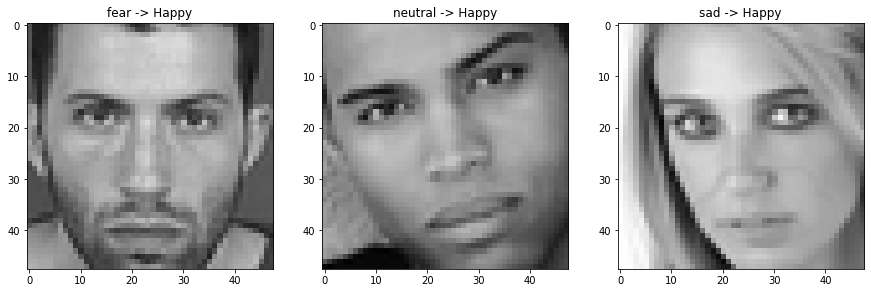

In [ ]:
index3 = []
title = ['fear -> Happy', 'neutral -> Happy', 'sad -> Happy']

fear = np.where(testC_labels == 2)
neutral = np.where(testC_labels == 4)
sad = np.where(testC_labels == 5)
happy_pred = np.where(prediction5 == 3)

# angry misclassified as sad
fear_to_neutral = np.intersect1d(fear, happy_pred)
index3.append(fear_to_neutral[1])
# fear misclassified as sad
neutral_to_neutral = np.intersect1d(neutral, happy_pred)
index3.append(neutral_to_neutral[0])
# neutral misclassified as sad
sad_to_neutral = np.intersect1d(sad, happy_pred)
index3.append(sad_to_neutral[2])

Categories = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
datadir = 'test'
count = 0
count_img = 0

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (15, 15))

#path which contains all the categories of images
for i in Categories:
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        count += 1
        if (count in index3) :
            image = cv2.imread(os.path.join(path, img))
            # plot
            ax[count_img].imshow(image)
            ax[count_img].title.set_text(title.pop(0))
            count_img += 1            